<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [15]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [16]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [17]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [18]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [19]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [20]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


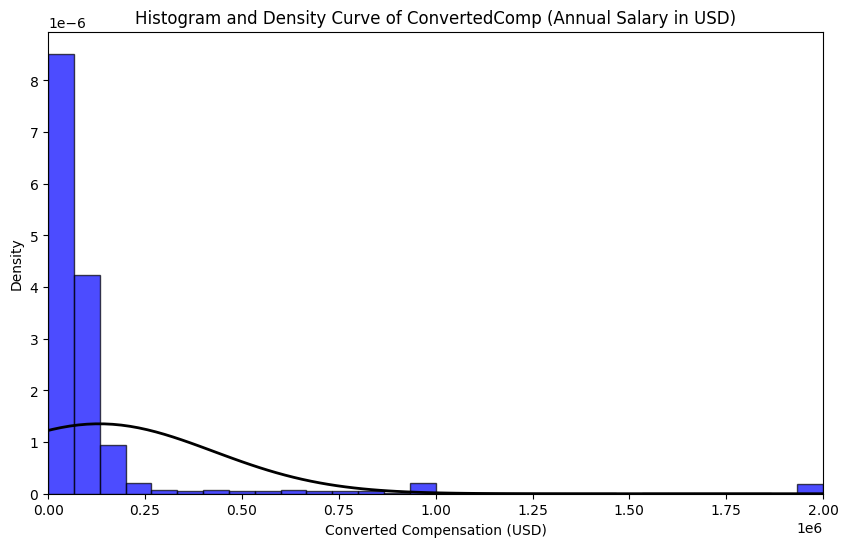

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Drop any NaN values from ConvertedComp
converted_comp = df['ConvertedComp'].dropna()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(converted_comp, bins=30, density=True, color='blue', alpha=0.7, edgecolor='black')

# Overlaying the density curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - converted_comp.mean()) / converted_comp.std())**2) / (converted_comp.std() * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

plt.title('Histogram and Density Curve of ConvertedComp (Annual Salary in USD)')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.xlim(0, df['ConvertedComp'].max())  # Set x-axis limit
plt.show()


Plot the histogram for the column `ConvertedComp`.


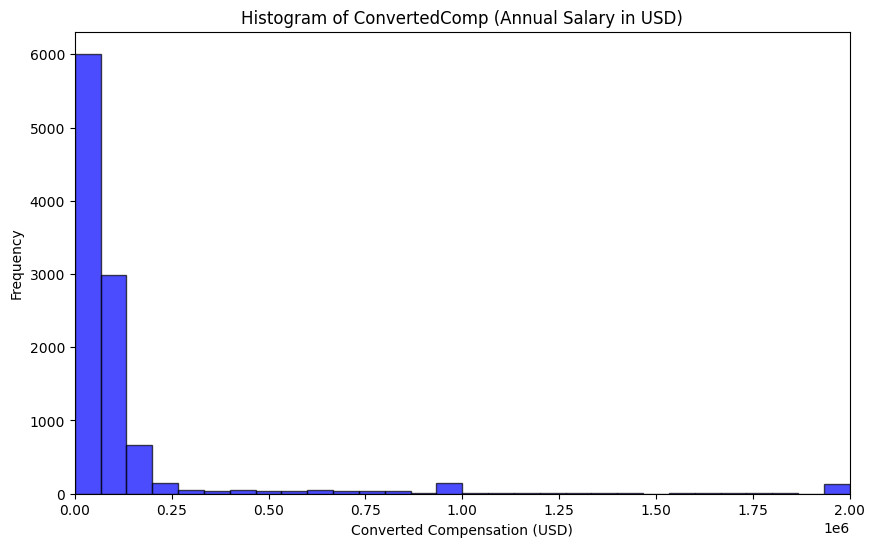

In [24]:
# your code goes here
# Import necessary libraries (if not already imported)
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming you have already downloaded it)
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Plot the histogram for ConvertedComp
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of ConvertedComp (Annual Salary in USD)')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.xlim(0, df['ConvertedComp'].max())  # Set x-axis limit
plt.show()


What is the median of the column `ConvertedComp`?


In [27]:
# your code goes here
# Calculate the median of the ConvertedComp column
median_converted_comp = df['ConvertedComp'].median()

# Print the median
print(f"The median of ConvertedComp (Annual Salary in USD) is: {median_converted_comp}")


The median of ConvertedComp (Annual Salary in USD) is: 57745.0


How many responders identified themselves only as a **Man**?


In [28]:
# your code goes here
# Count the number of responders who identified as 'Man'
num_men_responders = df[df['Gender'] == 'Man'].shape[0]

# Print the result
print(f"The number of responders who identified themselves only as a Man is: {num_men_responders}")


The number of responders who identified themselves only as a Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [29]:
# your code goes here
# Calculate the median of ConvertedComp for responders identified as 'Woman'
median_women_converted_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

# Print the result
print(f"The median ConvertedComp (Annual Salary in USD) for responders identified as a Woman is: {median_women_converted_comp}")


The median ConvertedComp (Annual Salary in USD) for responders identified as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [31]:
# Get the five-number summary for the Age column
five_number_summary = df['Age'].describe()

# Extract the specific values
min_age = five_number_summary['min']
q1_age = five_number_summary['25%']
median_age = five_number_summary['50%']
q3_age = five_number_summary['75%']
max_age = five_number_summary['max']

# Print the five-number summary
print("Five Number Summary for Age:")
print(f"Minimum: {min_age}")
print(f"First Quartile (Q1): {q1_age}")
print(f"Median (Q2): {median_age}")
print(f"Third Quartile (Q3): {q3_age}")
print(f"Maximum: {max_age}")


Five Number Summary for Age:
Minimum: 16.0
First Quartile (Q1): 25.0
Median (Q2): 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


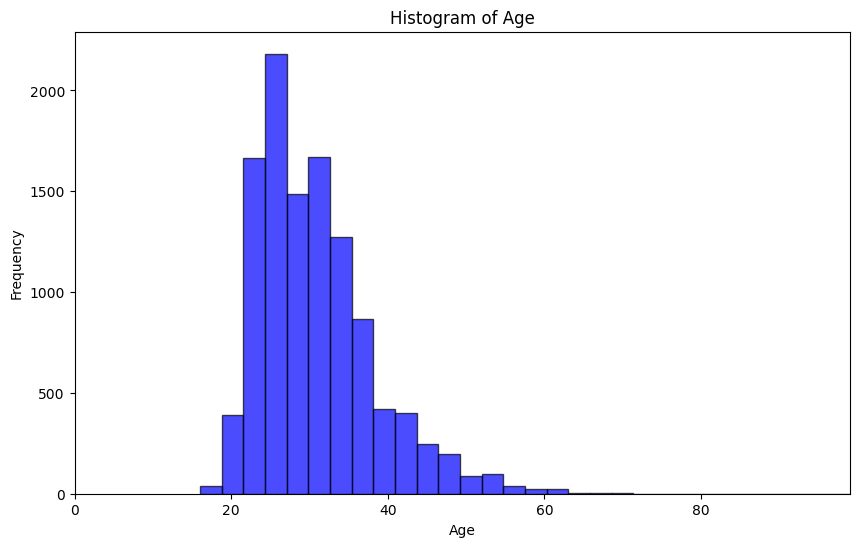

In [32]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Plot the histogram for Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, df['Age'].max())  # Set x-axis limit
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


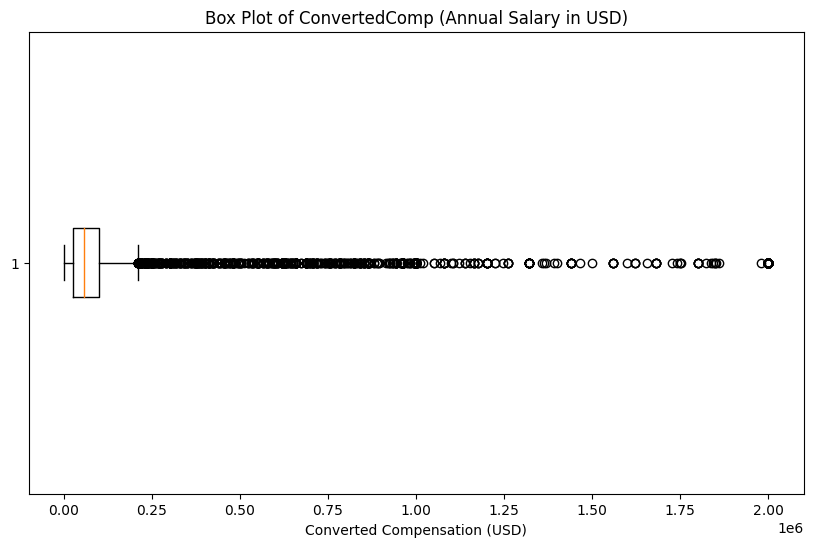

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Create a box plot for ConvertedComp using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of ConvertedComp (Annual Salary in USD)')
plt.xlabel('Converted Compensation (USD)')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [36]:
# your code goes here
# Load the dataset into a DataFrame
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Calculate Q1 and Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the results
print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Interquartile Range (IQR) for ConvertedComp: {IQR}")



First Quartile (Q1): 26868.0
Third Quartile (Q3): 100000.0
Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [37]:
# your code goes here
# Load the dataset into a DataFrame
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Calculate Q1 and Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound for outliers: {lower_bound}")
print(f"Upper Bound for outliers: {upper_bound}")


First Quartile (Q1): 26868.0
Third Quartile (Q3): 100000.0
Interquartile Range (IQR): 73132.0
Lower Bound for outliers: -82830.0
Upper Bound for outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [38]:
# your code goes here
# Load the dataset into a DataFrame
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Calculate Q1 and Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the ConvertedComp column
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the results
print(f"Number of outliers in the ConvertedComp column: {num_outliers}")


Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [39]:
# your code goes here
# Load the dataset into a DataFrame
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Calculate Q1 and Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers in ConvertedComp
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the shape of the new DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame shape (without outliers): {df_no_outliers.shape}")


Original DataFrame shape: (11398, 85)
New DataFrame shape (without outliers): (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [41]:
# Load the dataset into a DataFrame
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Get the correlation of Age with all other numerical columns
age_correlation = correlation_matrix['Age']

# Print the correlation values
print("Correlation of Age with other numerical columns:")
print(age_correlation)


Correlation of Age with other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
